In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day-1)

In [3]:
REL_df = pd.DataFrame(data.DataReader('BSE/BOM500325', 'quandl', start=start, end=end ))

In [4]:
REL_df.head()

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2018-08-17,1206.0,1215.0,1200.25,1203.45,1208.41,190969.0,4483.0,230768070.0,44000.0,23.04,14.75,-2.55
2018-08-16,1206.4,1215.7,1196.25,1200.20,1204.83,323707.0,6759.0,390012448.0,93709.0,28.95,19.45,-6.20
2018-08-14,1187.2,1216.4,1185.25,1210.95,1203.73,313057.0,7748.0,376834985.0,80767.0,25.80,31.15,23.75
2018-08-13,1203.0,1203.0,1183.05,1187.15,1191.40,223453.0,5606.0,266222453.0,59977.0,26.84,19.95,-15.85
2018-08-10,1215.0,1215.3,1201.95,1204.00,1207.81,171098.0,4431.0,206653904.0,52765.0,30.84,13.35,-11.00


# Candle Stick Presentation

In [5]:
from matplotlib import dates, ticker
# from matplotlib.finance import candlestick2_ochl
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

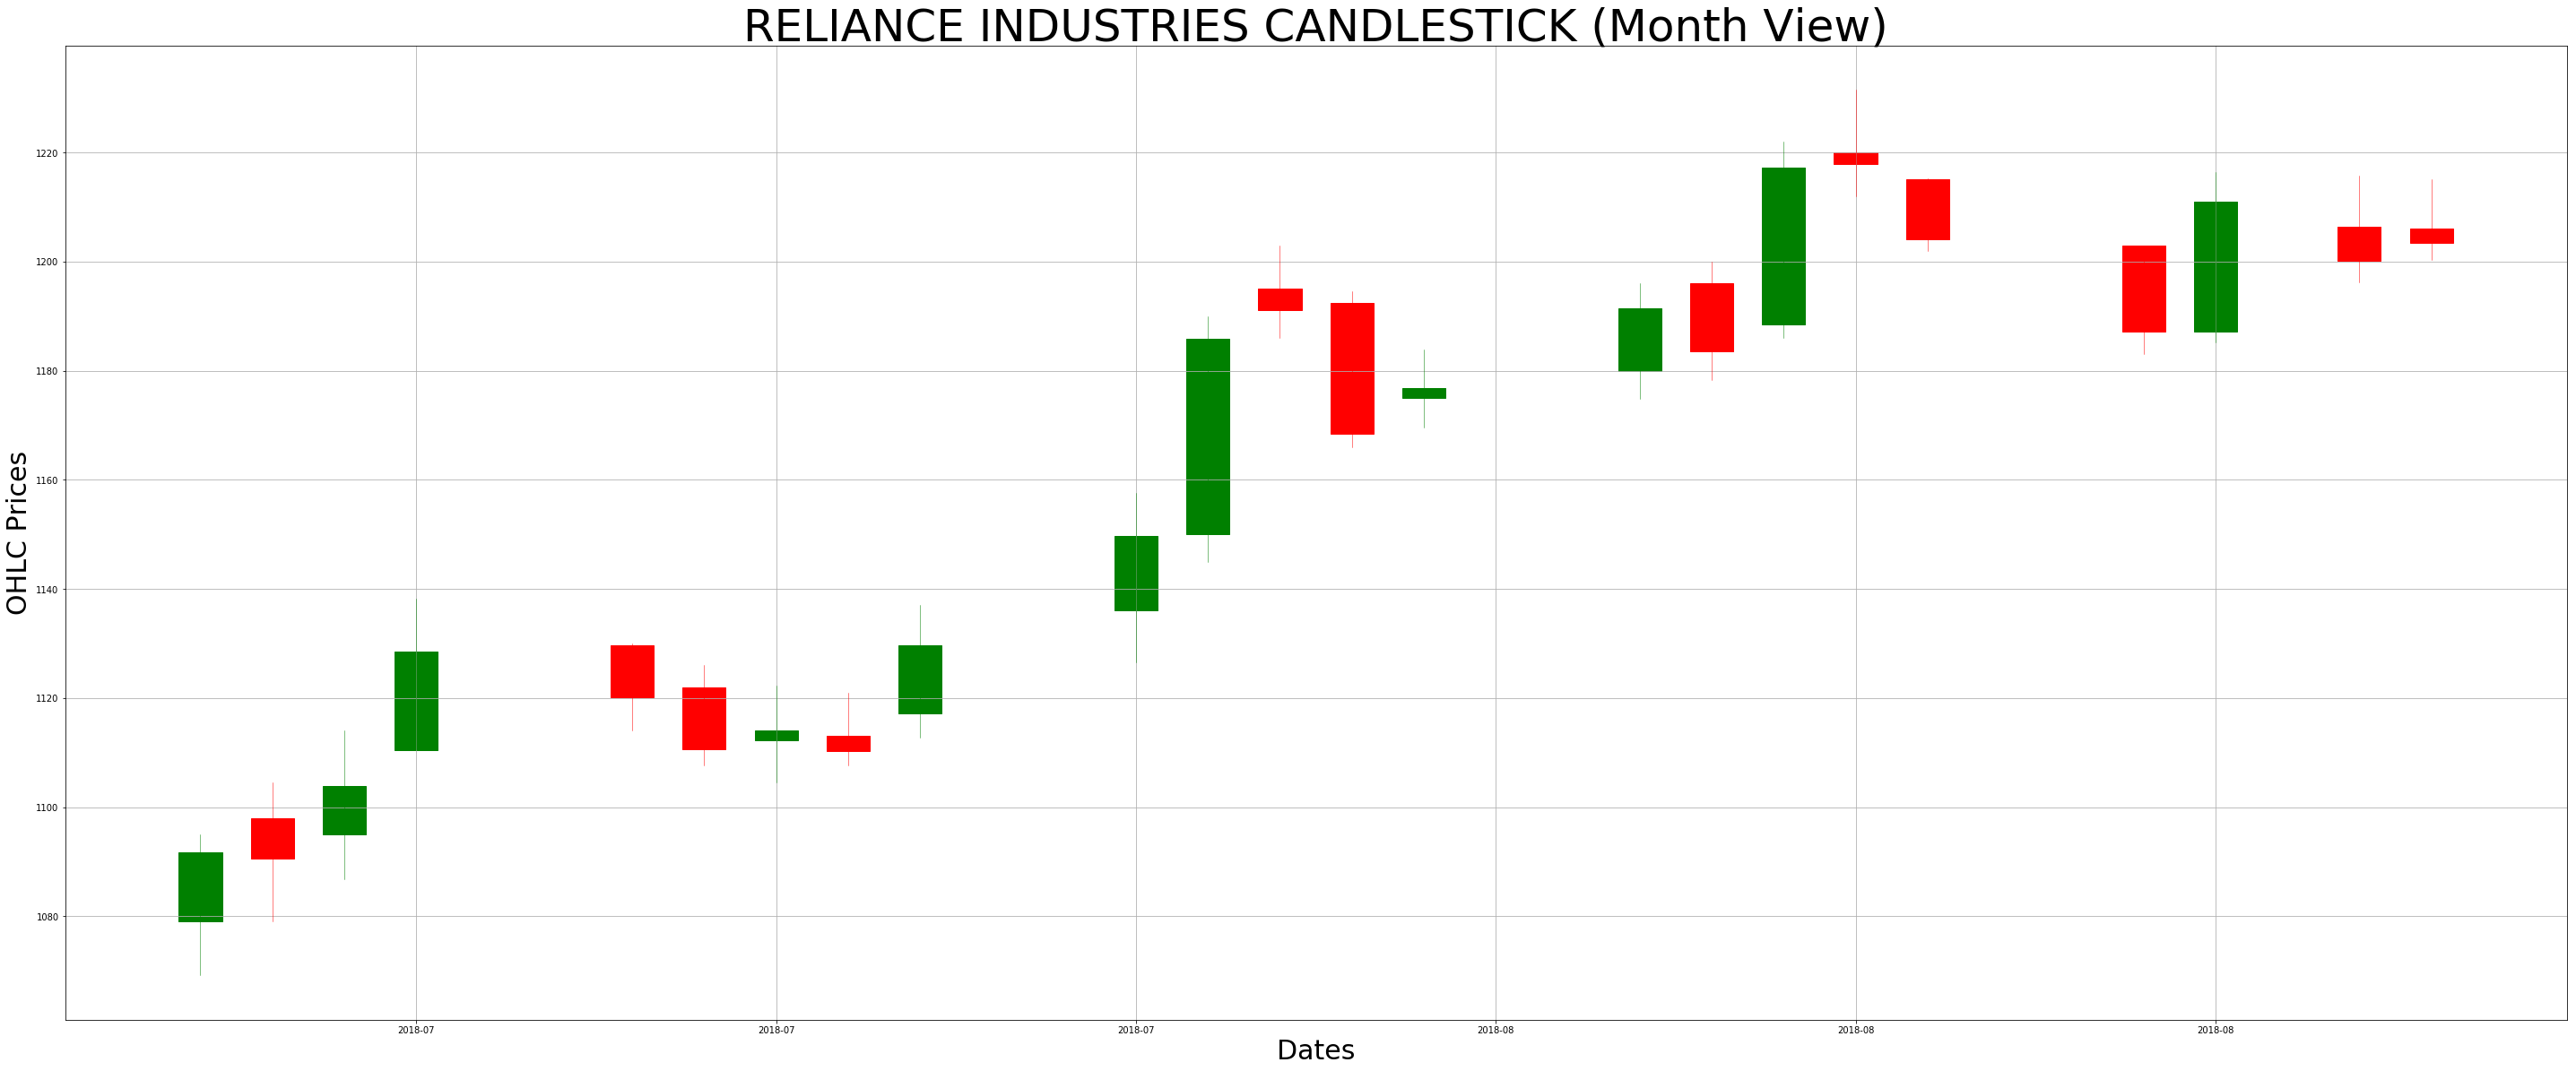

In [6]:
#formating the date
REL_df['Date'] = REL_df.index.map(mdates.date2num)
ohlc =REL_df[['Date','Open','High','Low','Close']]

fig, ax = pt.subplots(figsize = (50,20))

# ploting the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')

#formating the axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('Dates',size=30)
ax.set_ylabel('OHLC Prices', size=30)
ax.set_title('RELIANCE INDUSTRIES CANDLESTICK (Month View)', size=50)
pt.savefig("RELIANCE INDUSTRIES CANDLESTICK one month from today")
ax.grid(True)

pt.show()

# Volume

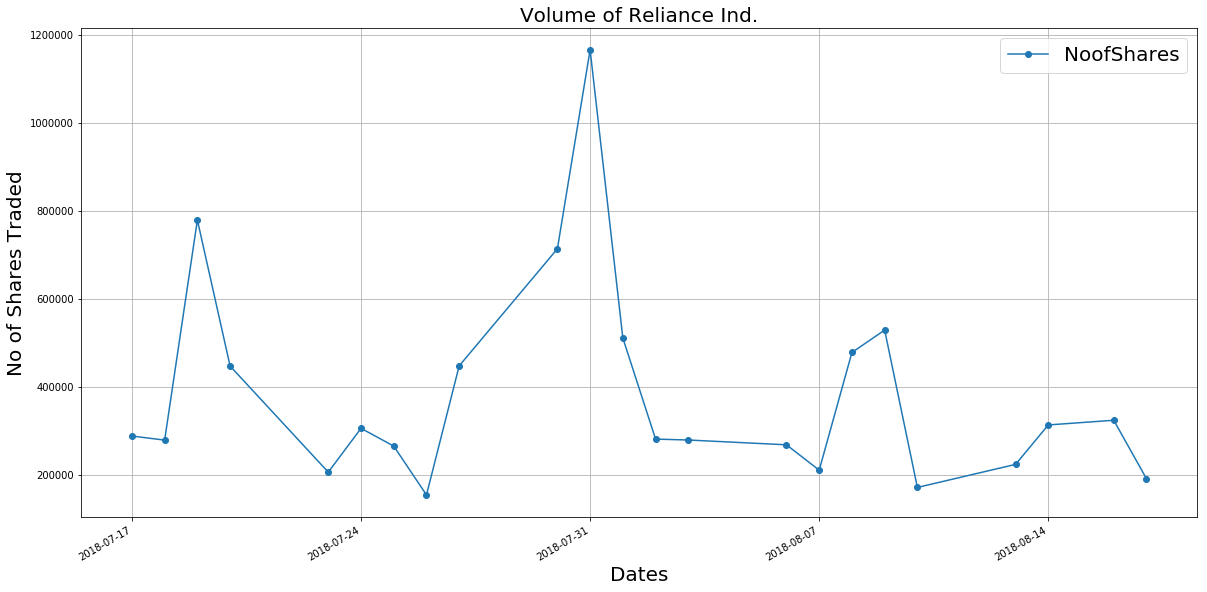

In [7]:
fig, bx = pt.subplots(figsize = (20,10))
REL_df['NoofShares'].plot(legend=True, marker='o')
bx.set_xlabel('Dates',size=30, fontsize=20)
bx.set_ylabel('No of Shares Traded', size=20)
bx.set_title('Volume of Reliance Ind.', size=20)
pt.legend(prop={'size':20})
bx.grid(True)
pt.show()

# Volume Weighted Avg Prices and Comparision

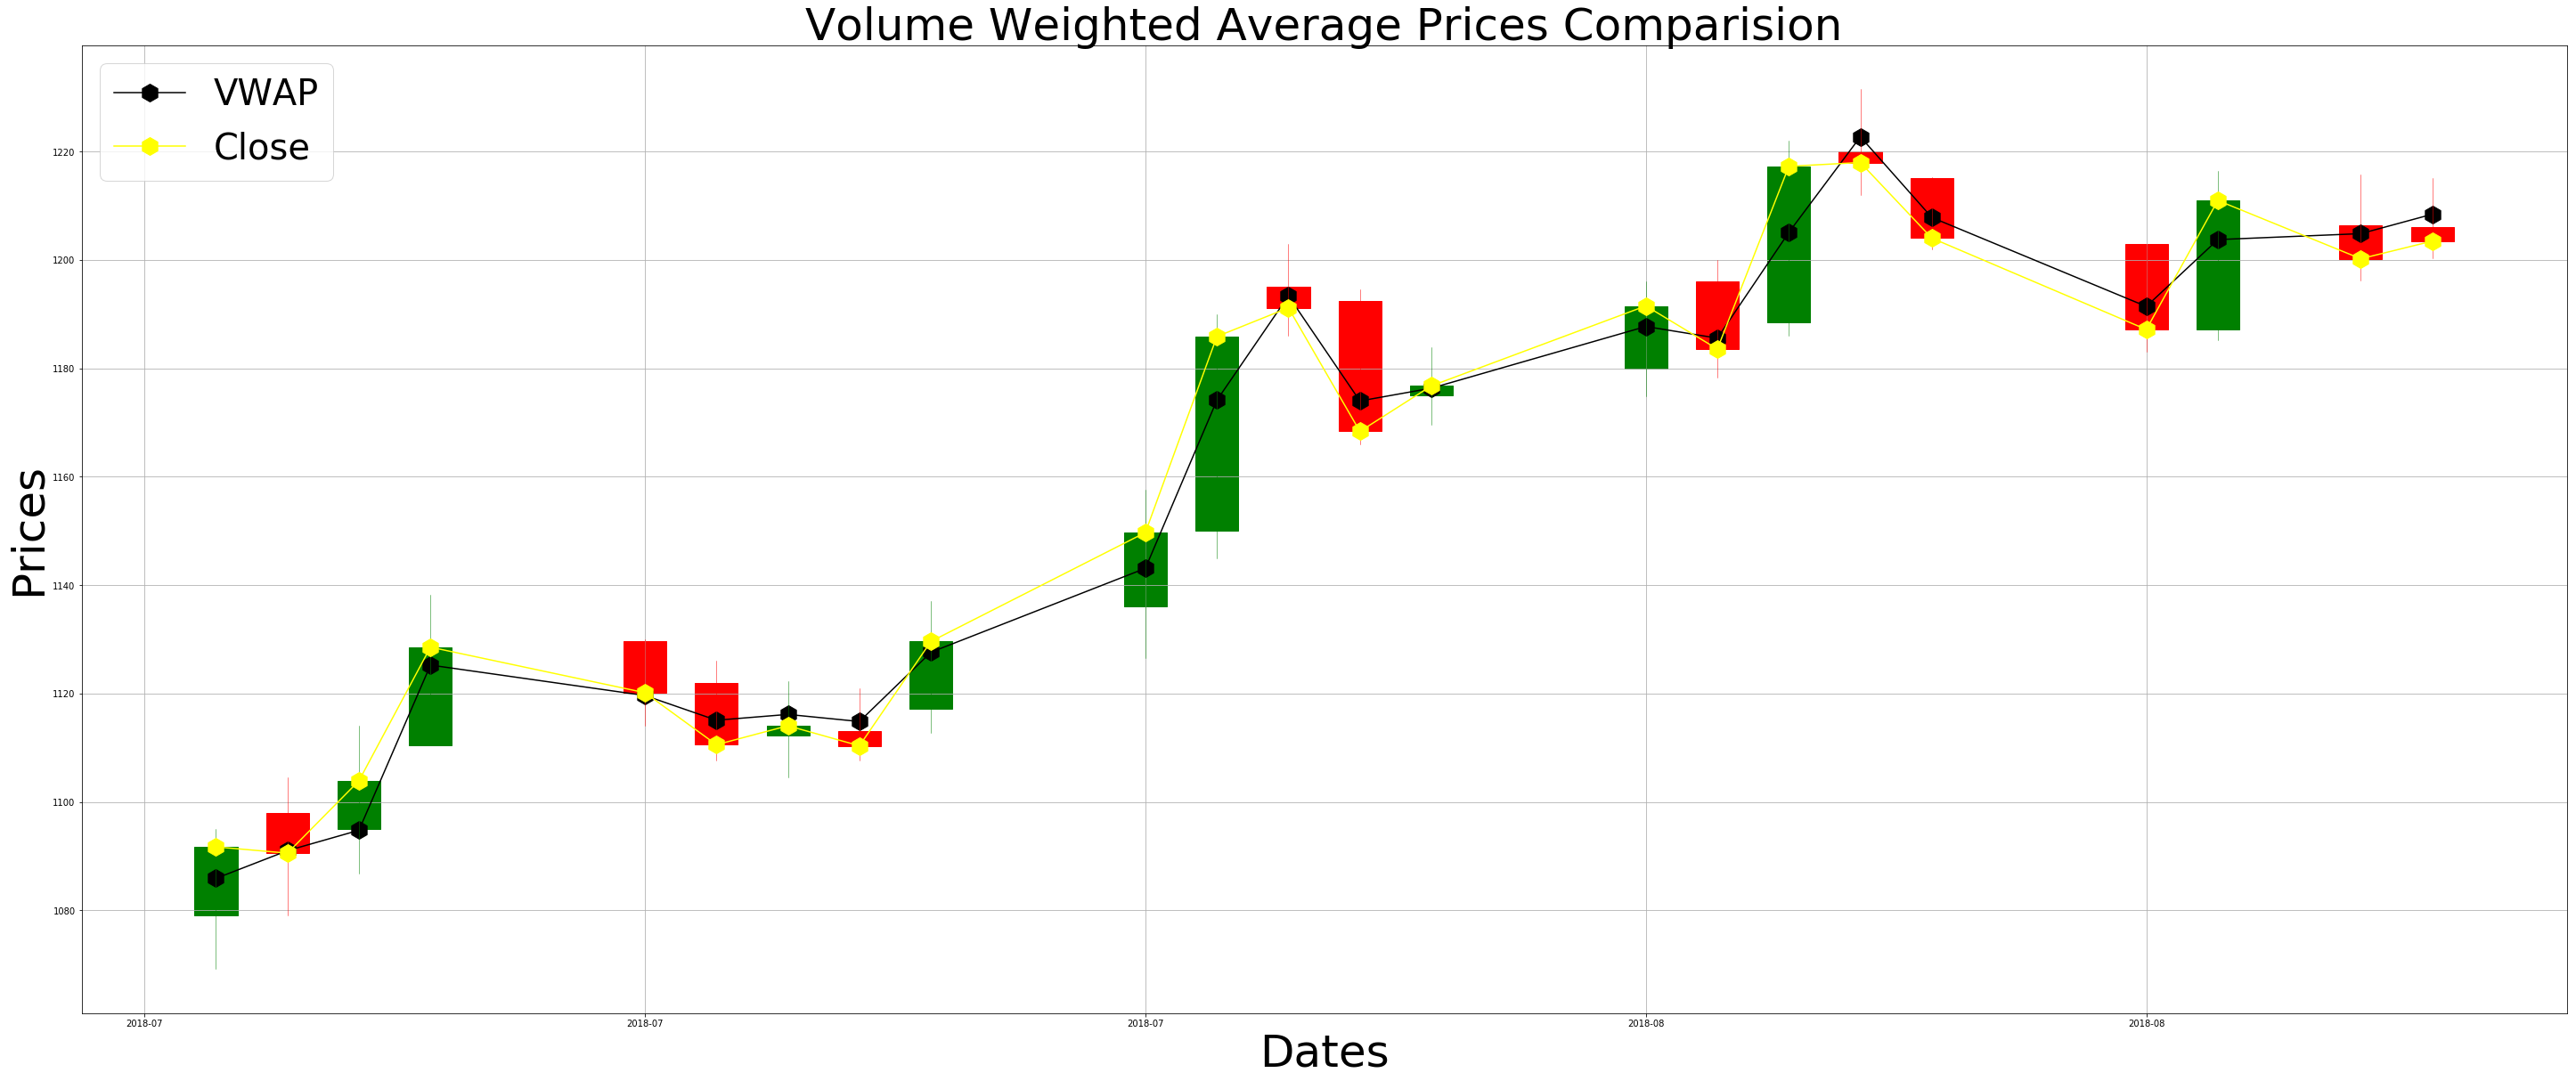

In [8]:
fig, Qx = pt.subplots(figsize = (50,20))
Qx.plot(REL_df.index, REL_df['WAP'], color = 'black', label = 'VWAP', marker='h', markersize=20)
# plot the candlesticks
candlestick_ohlc(Qx, ohlc.values, width=.6, colorup='green', colordown='red')

Qx.plot(REL_df.index, REL_df['Close'], color = 'yellow', label = 'Close', marker='h', markersize=20)
Qx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
Qx.set_xlabel('Dates',size=50)
Qx.set_ylabel('Prices', size=50)
Qx.set_title('Volume Weighted Average Prices Comparision', size=50)
Qx.grid(True)
Qx.legend()
pt.legend(prop={'size':40})
pt.show()

# Total Turnover

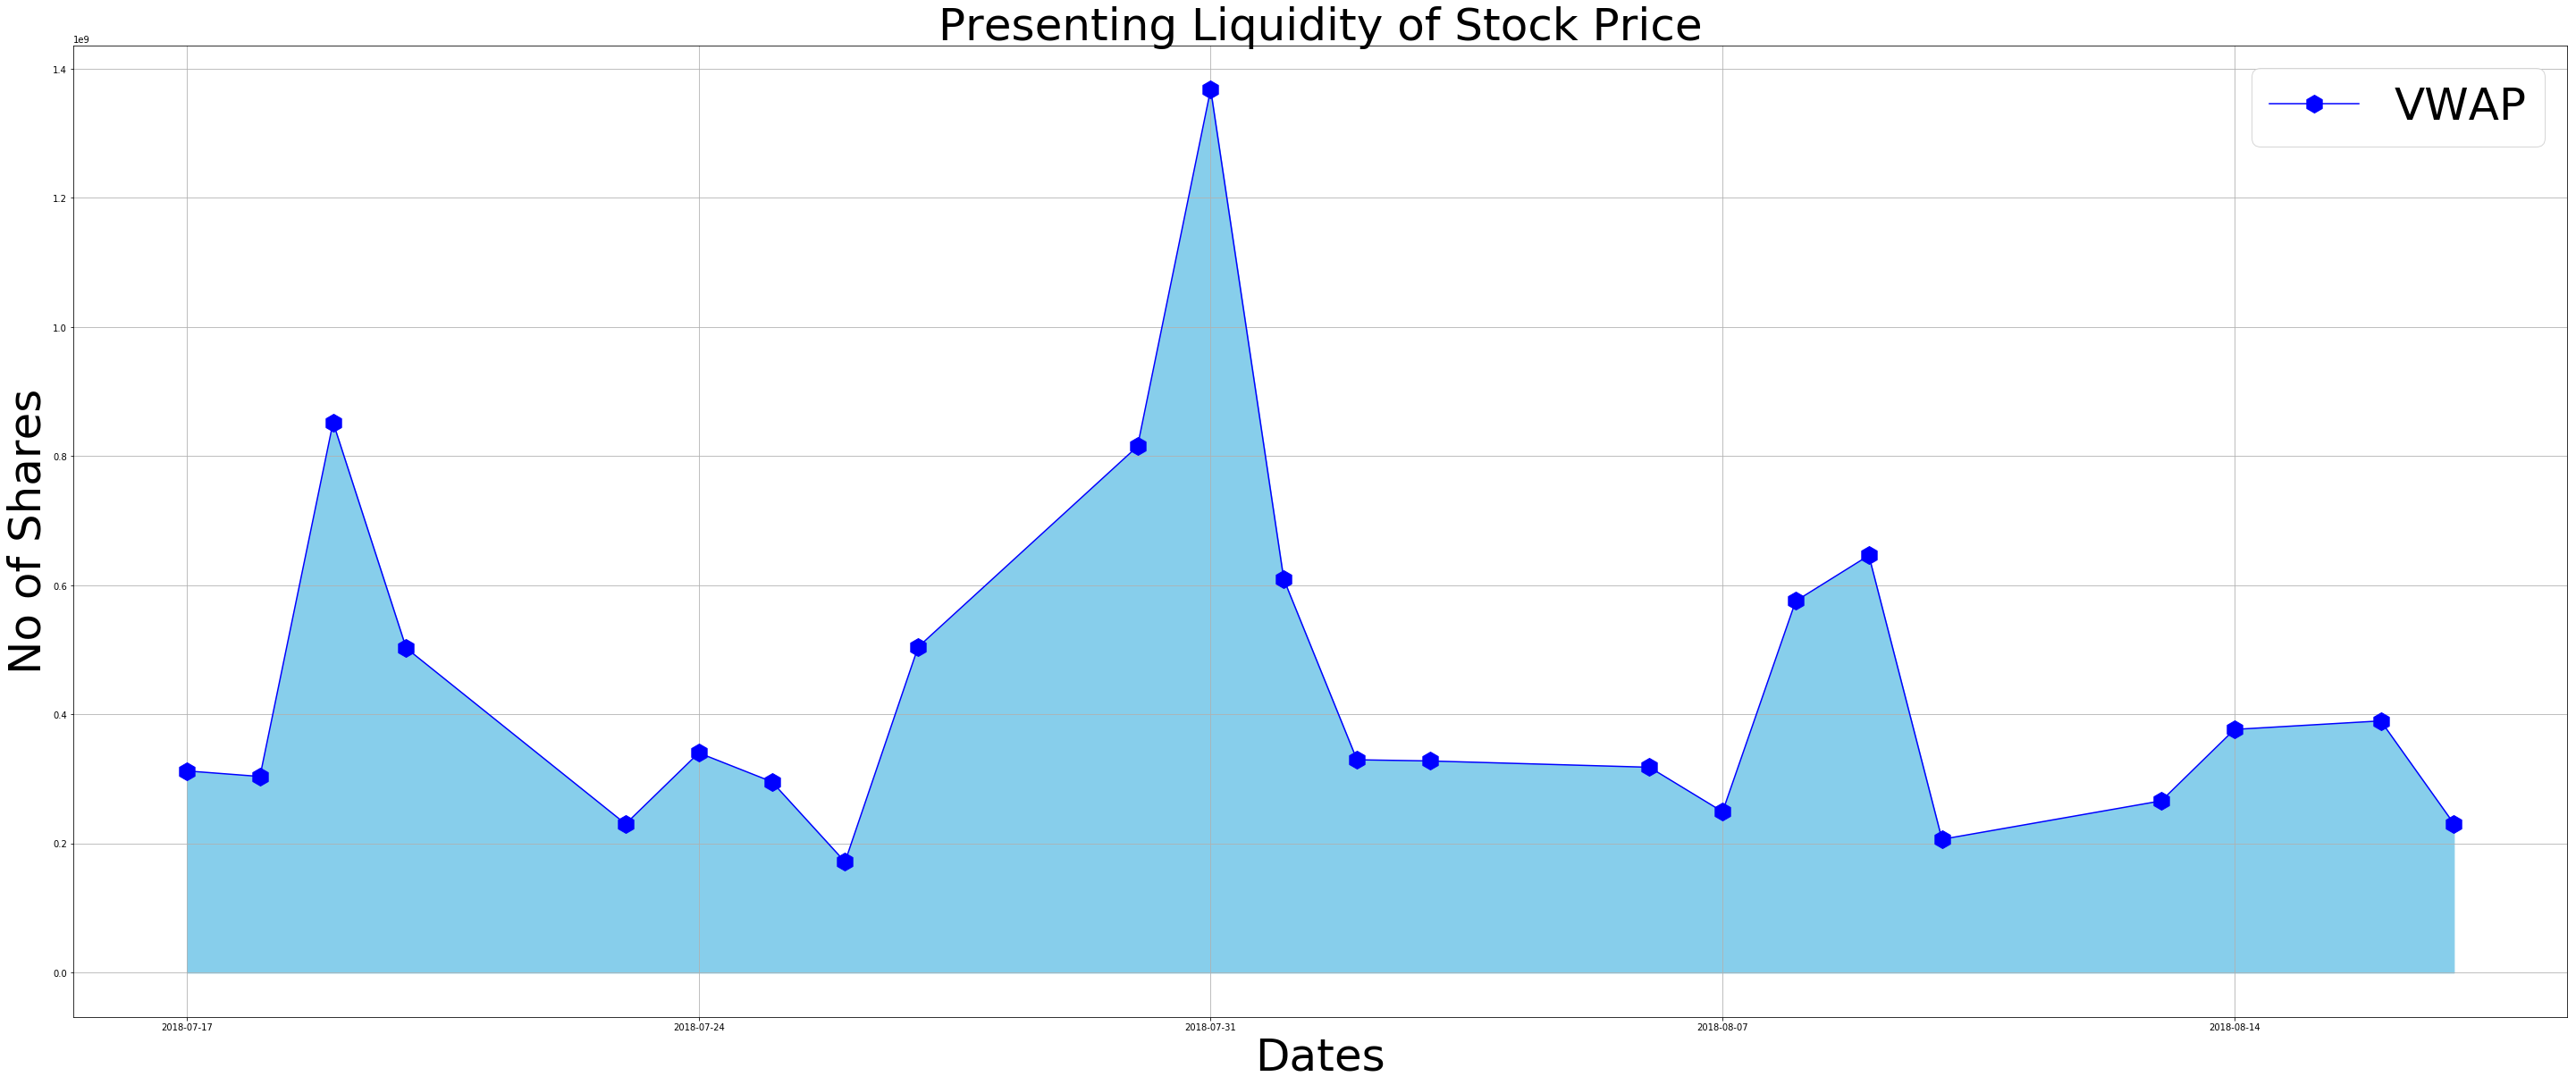

In [9]:
fig, wx = pt.subplots(figsize = (50,20))
wx.plot(REL_df.index, REL_df['TotalTurnover'], color = 'blue', label = 'VWAP', marker='h', markersize=20)
wx.set_xlabel('Dates',size=50)
wx.set_ylabel('No of Shares', size=50)
wx.set_title('Presenting Liquidity of Stock Price', size=50)
wx.fill_between(REL_df.index,REL_df['TotalTurnover'],color='skyblue')
# other parameters
wx.grid(True)
wx.legend()
pt.legend(prop={'size':50})

# Deliverable Quantity

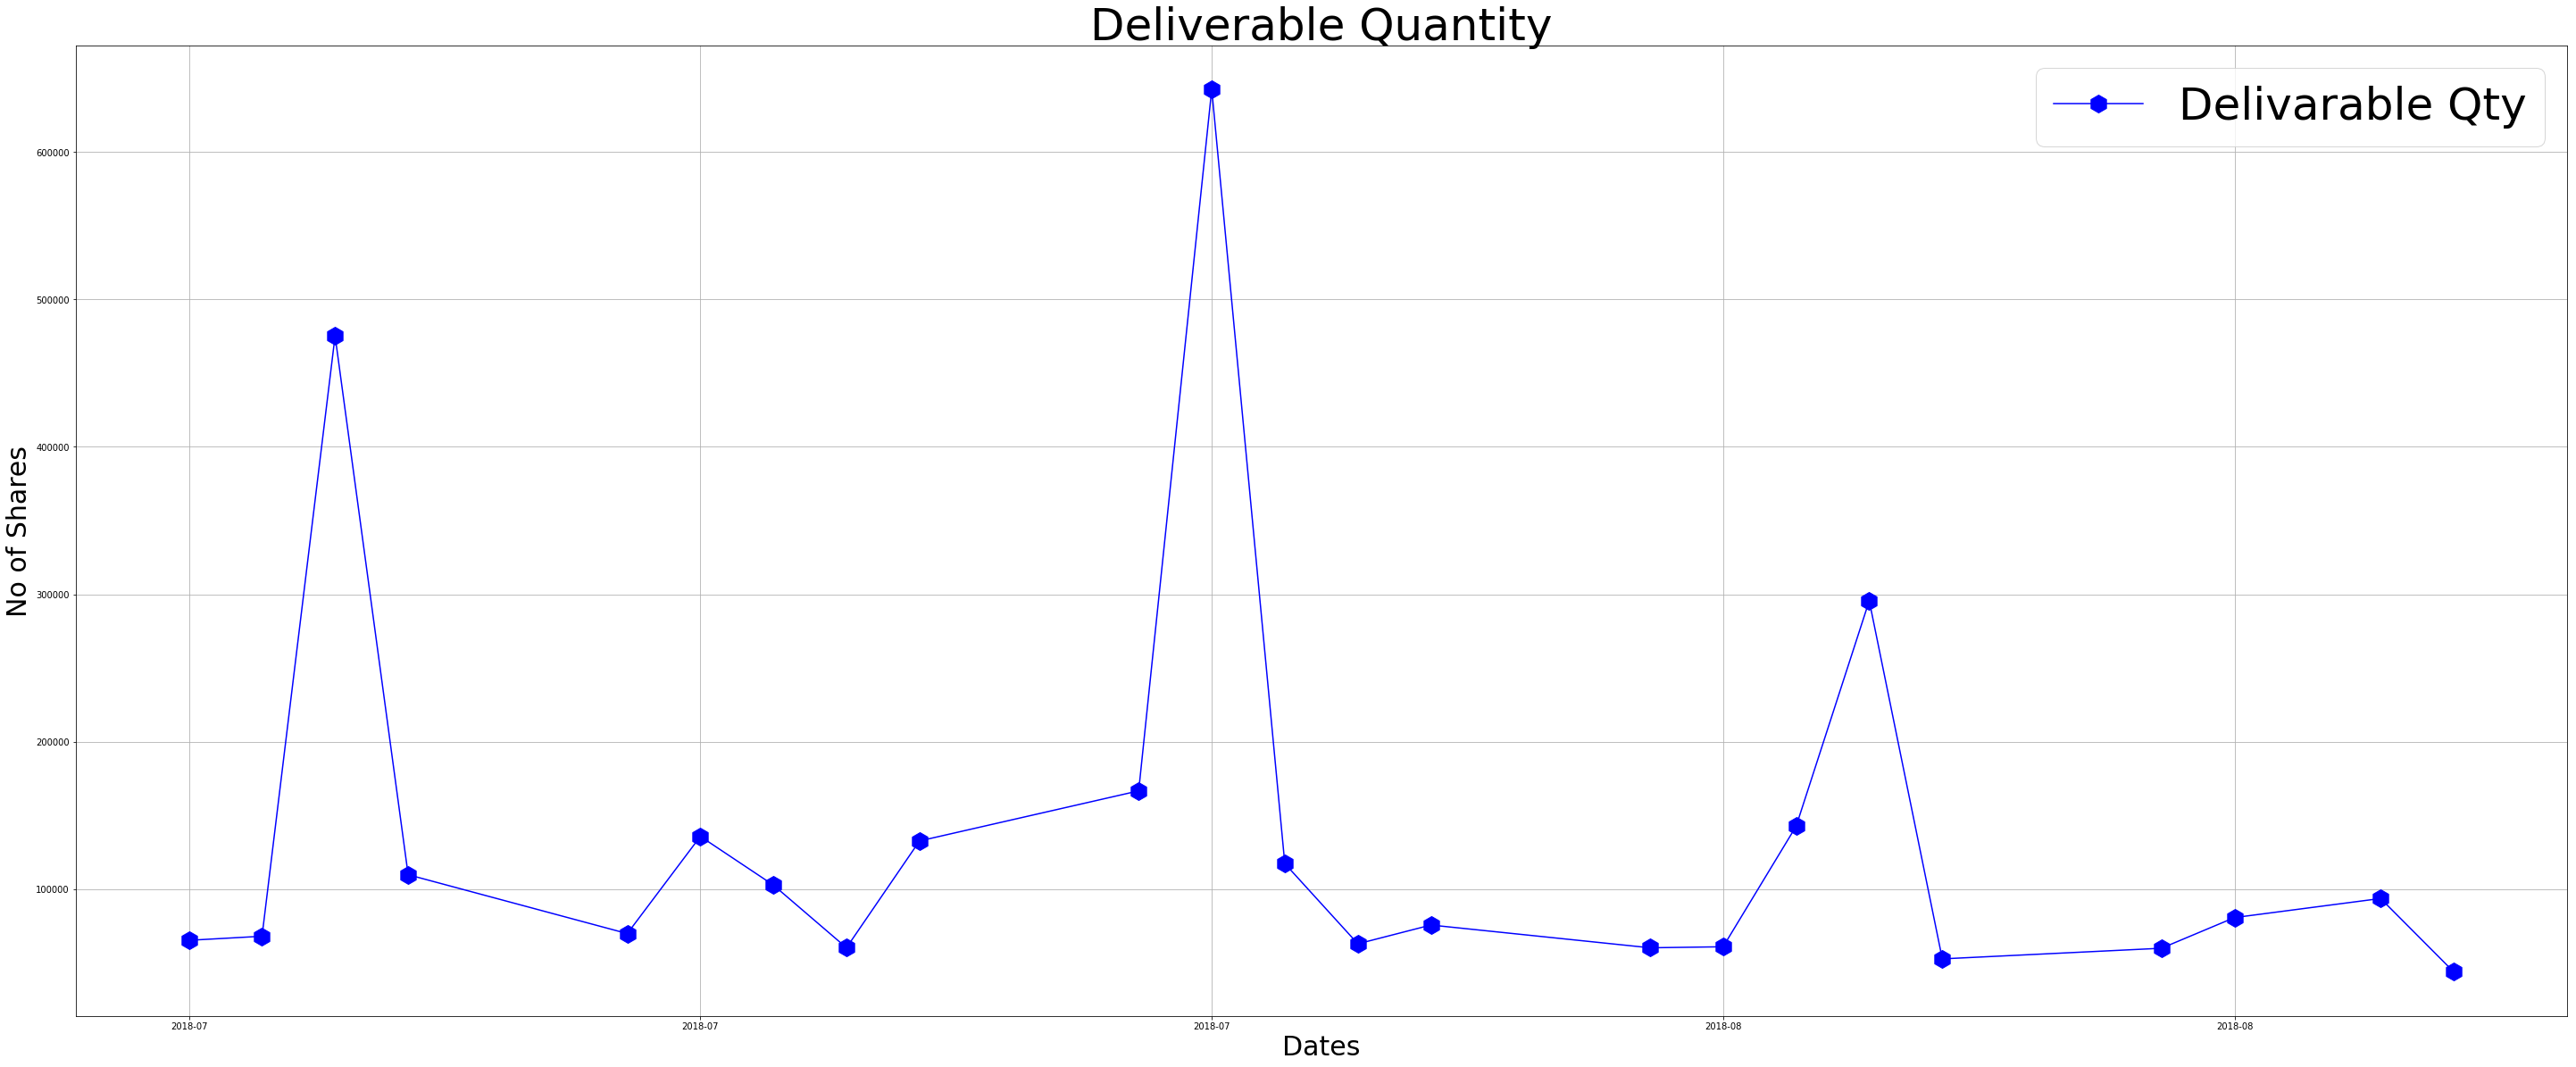

In [10]:
fig, gx = pt.subplots(figsize = (50,20))
gx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
gx.plot(REL_df.index, REL_df['DeliverableQuantity'], color = 'blue', label = 'Delivarable Qty', marker='h', markersize=20)
gx.set_xlabel('Dates',size=30, fontsize=30)
gx.set_ylabel('No of Shares', size=30)
gx.set_title('Deliverable Quantity', size=50)

# other parameters
gx.grid(True)
gx.legend()
pt.legend(prop={'size':50})

# Spread - Bid and Ask Price

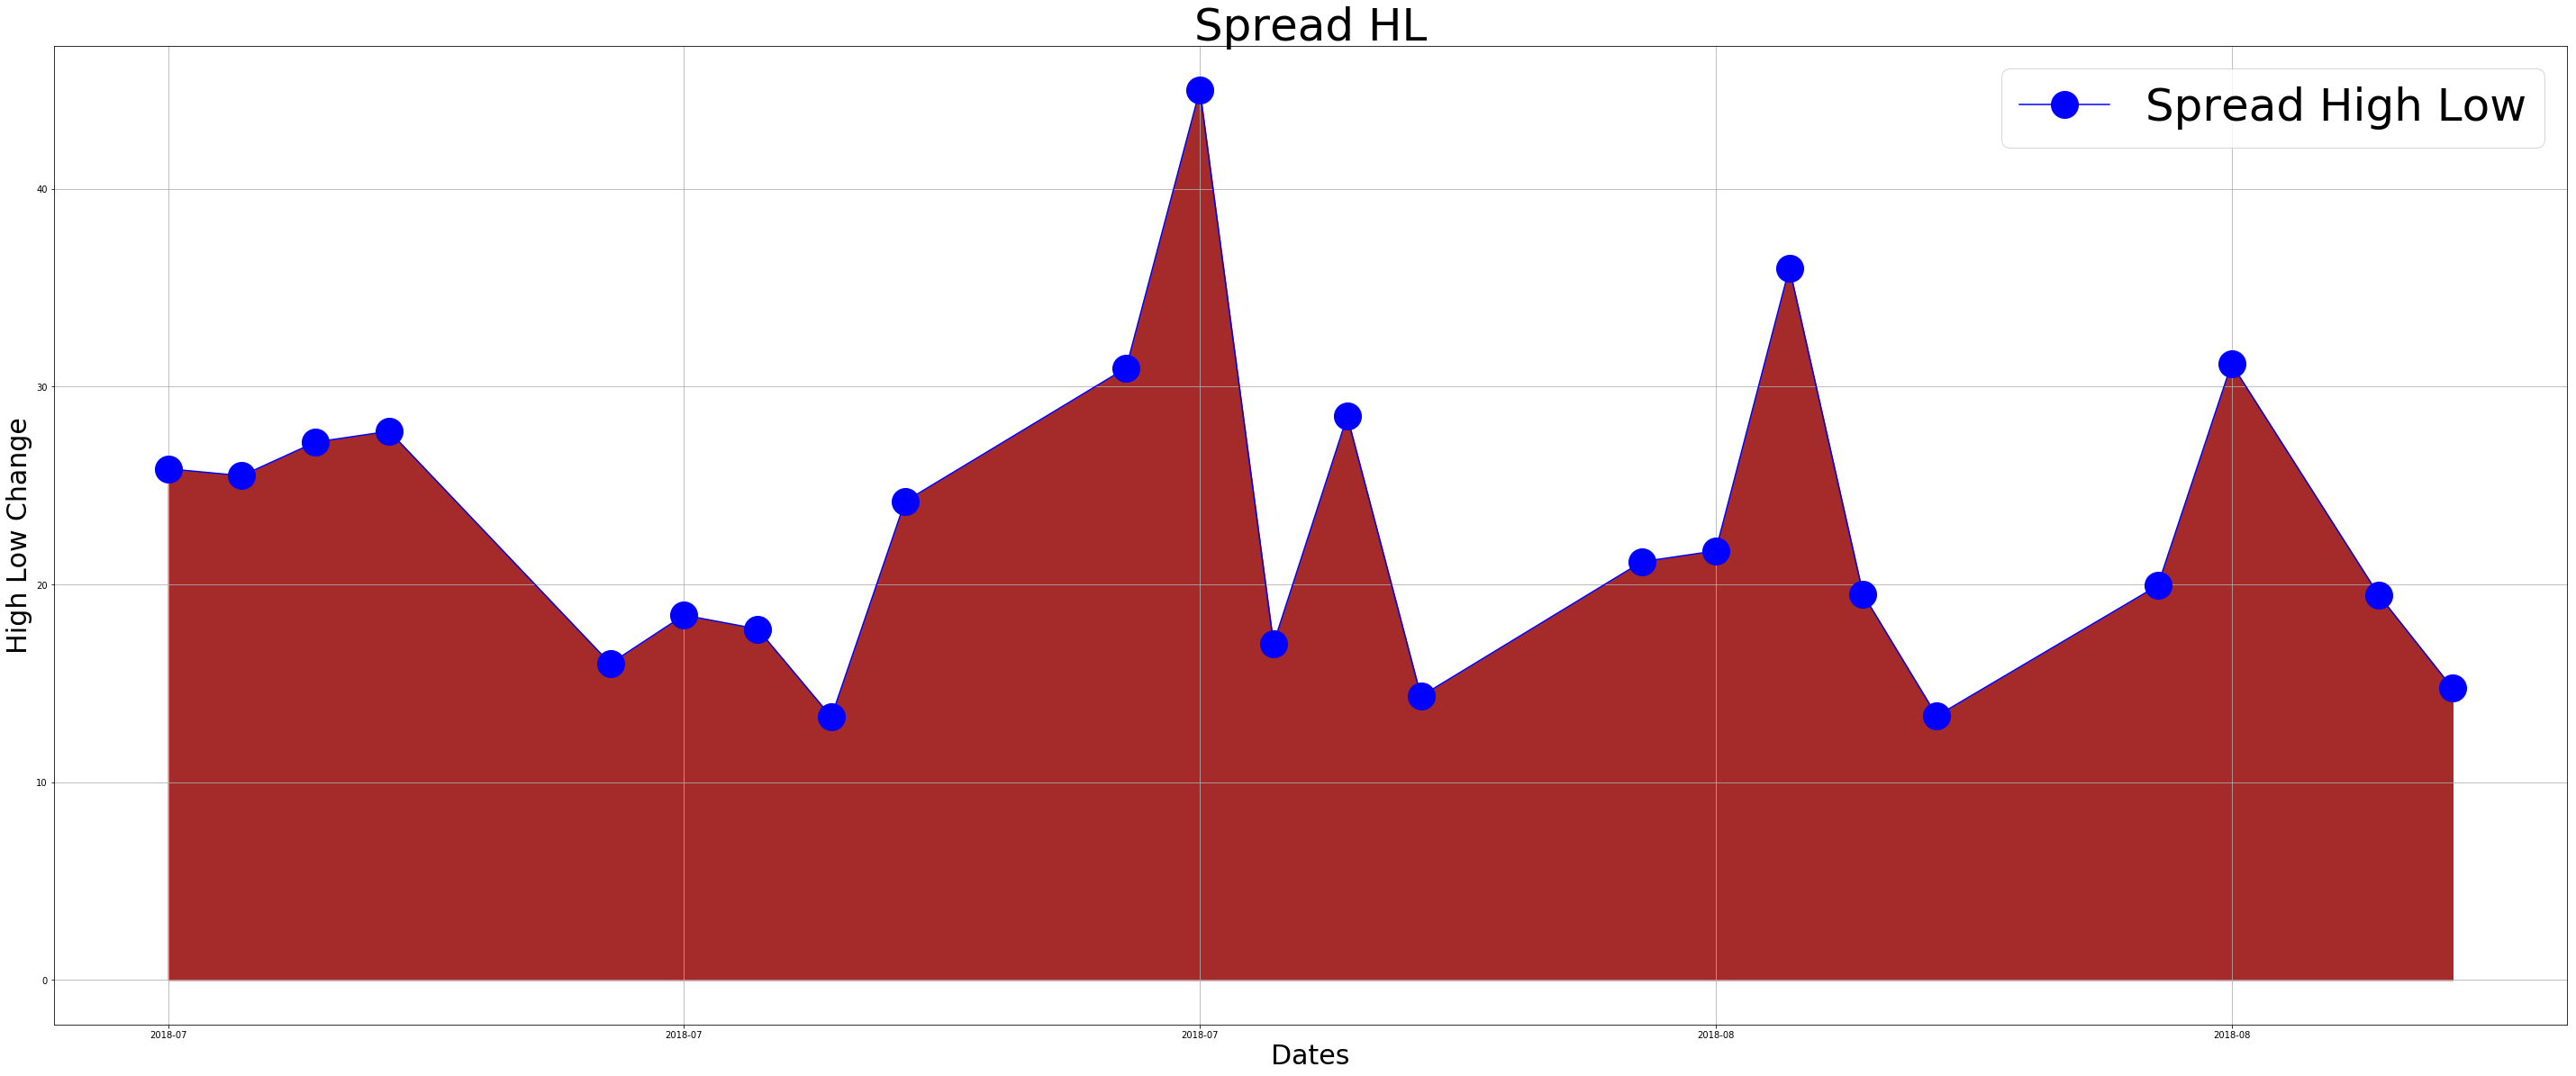

In [11]:
fig, lx = pt.subplots(figsize = (50,20))
lx.plot(REL_df.index, REL_df['SpreadHL'], color = 'blue', label = 'Spread High Low', marker='o', markersize=30)
lx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
lx.fill_between(REL_df.index,REL_df['SpreadHL'],color='brown')
lx.set_xlabel('Dates',size=30, fontsize=30)
lx.set_ylabel('High Low Change', size=30)
lx.set_title('Spread HL', size=50)

# other parameters
lx.grid(True)
lx.legend()
pt.legend(prop={'size':50})

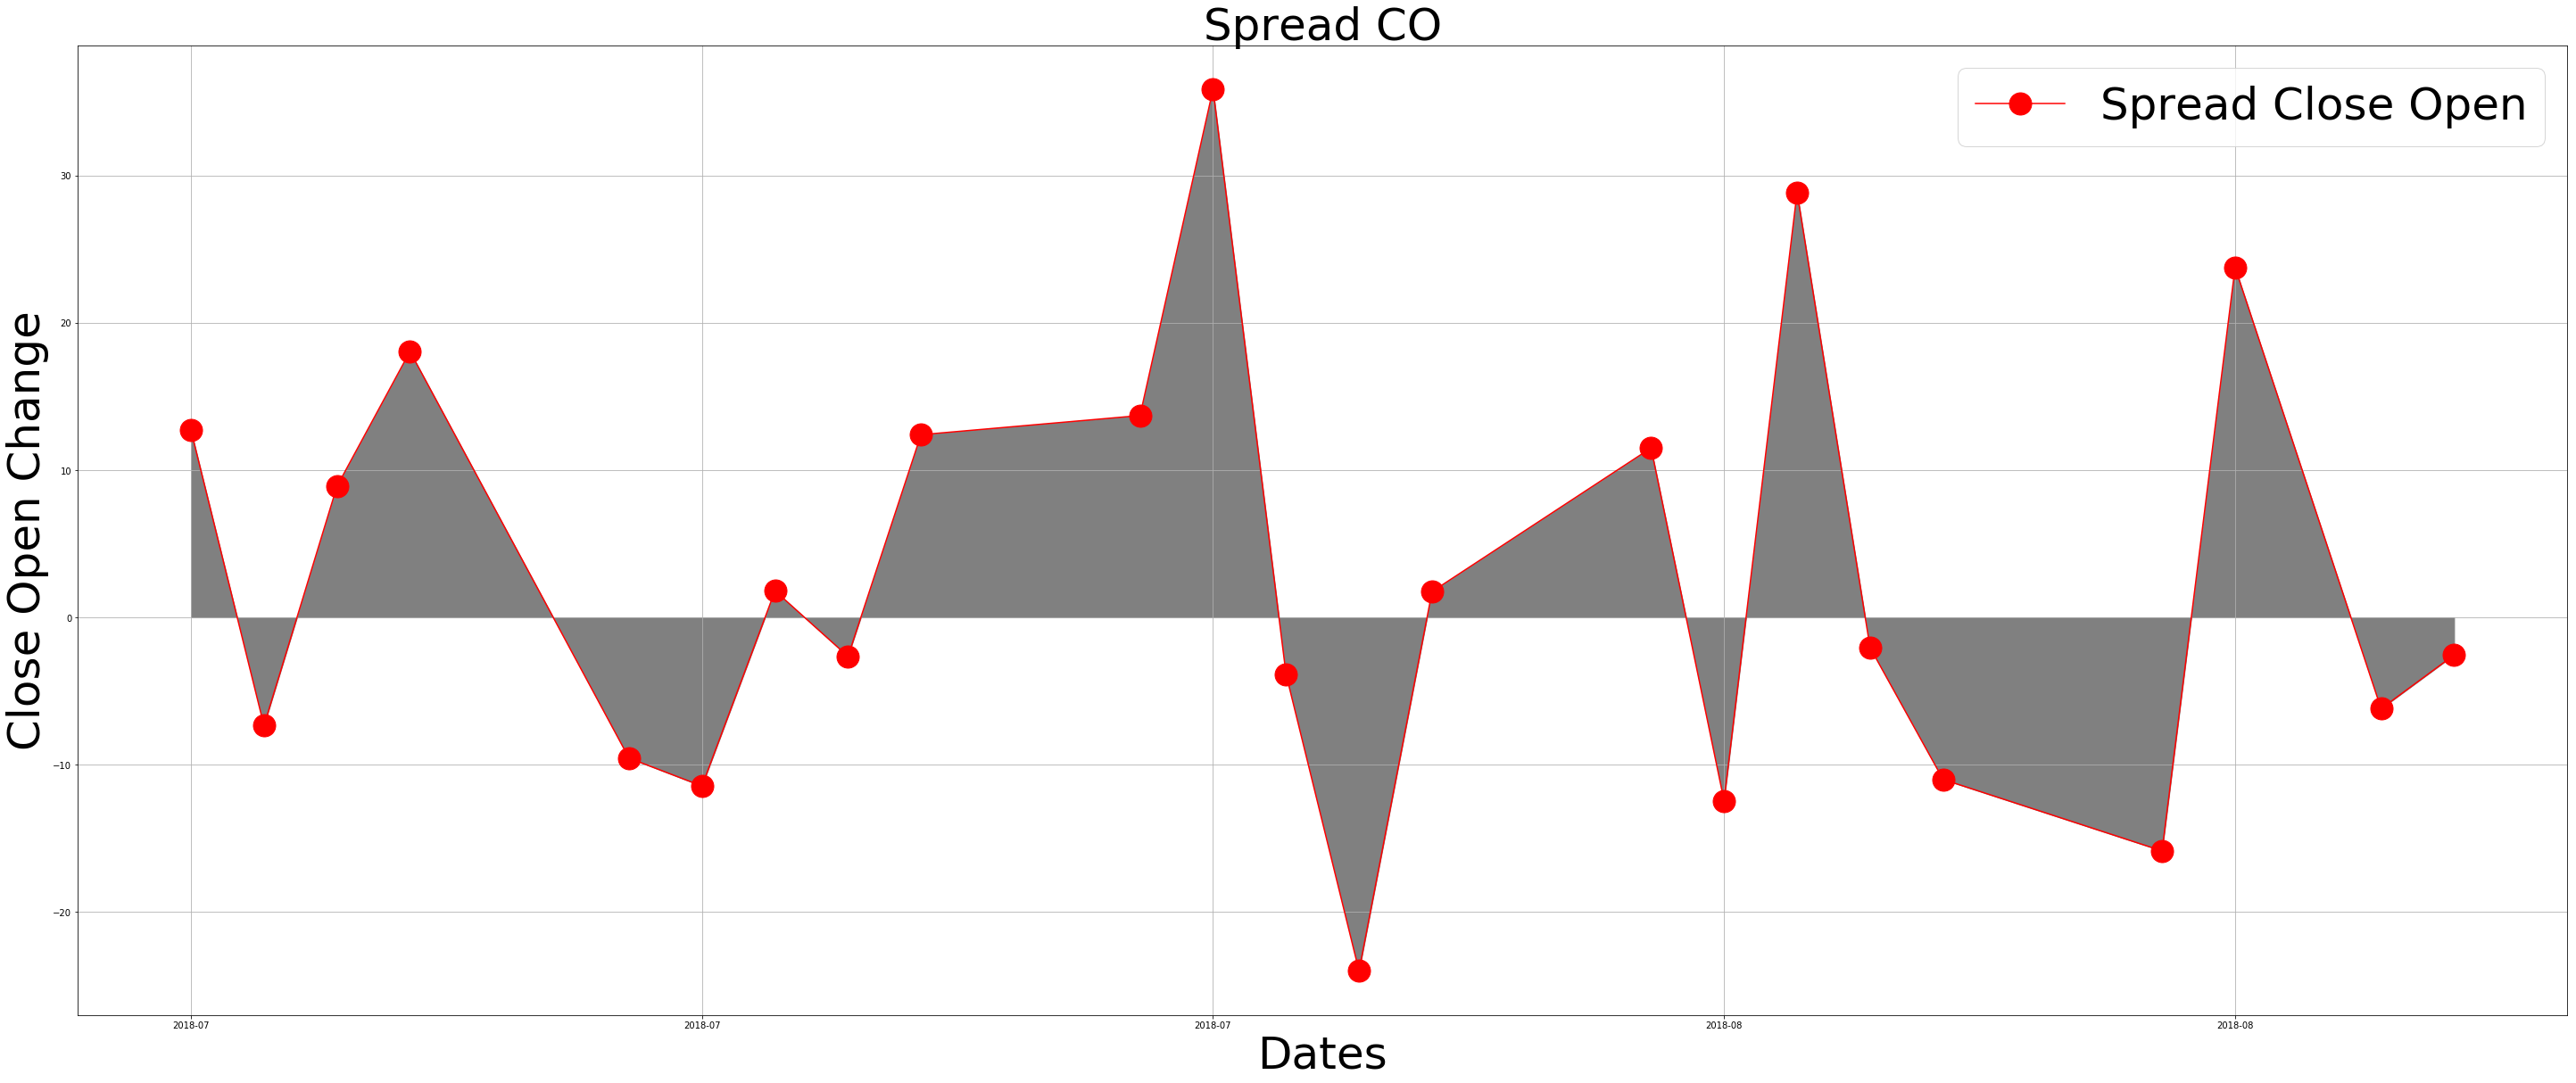

In [12]:
fig, mx = pt.subplots(figsize = (50,20))
mx.plot(REL_df.index, REL_df['SpreadCO'], color = 'red', label = 'Spread Close Open', marker='o', markersize=25)
mx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
mx.fill_between(REL_df.index,REL_df['SpreadCO'],color='grey')
mx.set_xlabel('Dates',size=50, fontsize=50)
mx.set_ylabel('Close Open Change', size=50)
mx.set_title('Spread CO', size=50)

# other parameters
mx.grid(True)
mx.legend()
pt.legend(prop={'size':50})

# Moving Averages

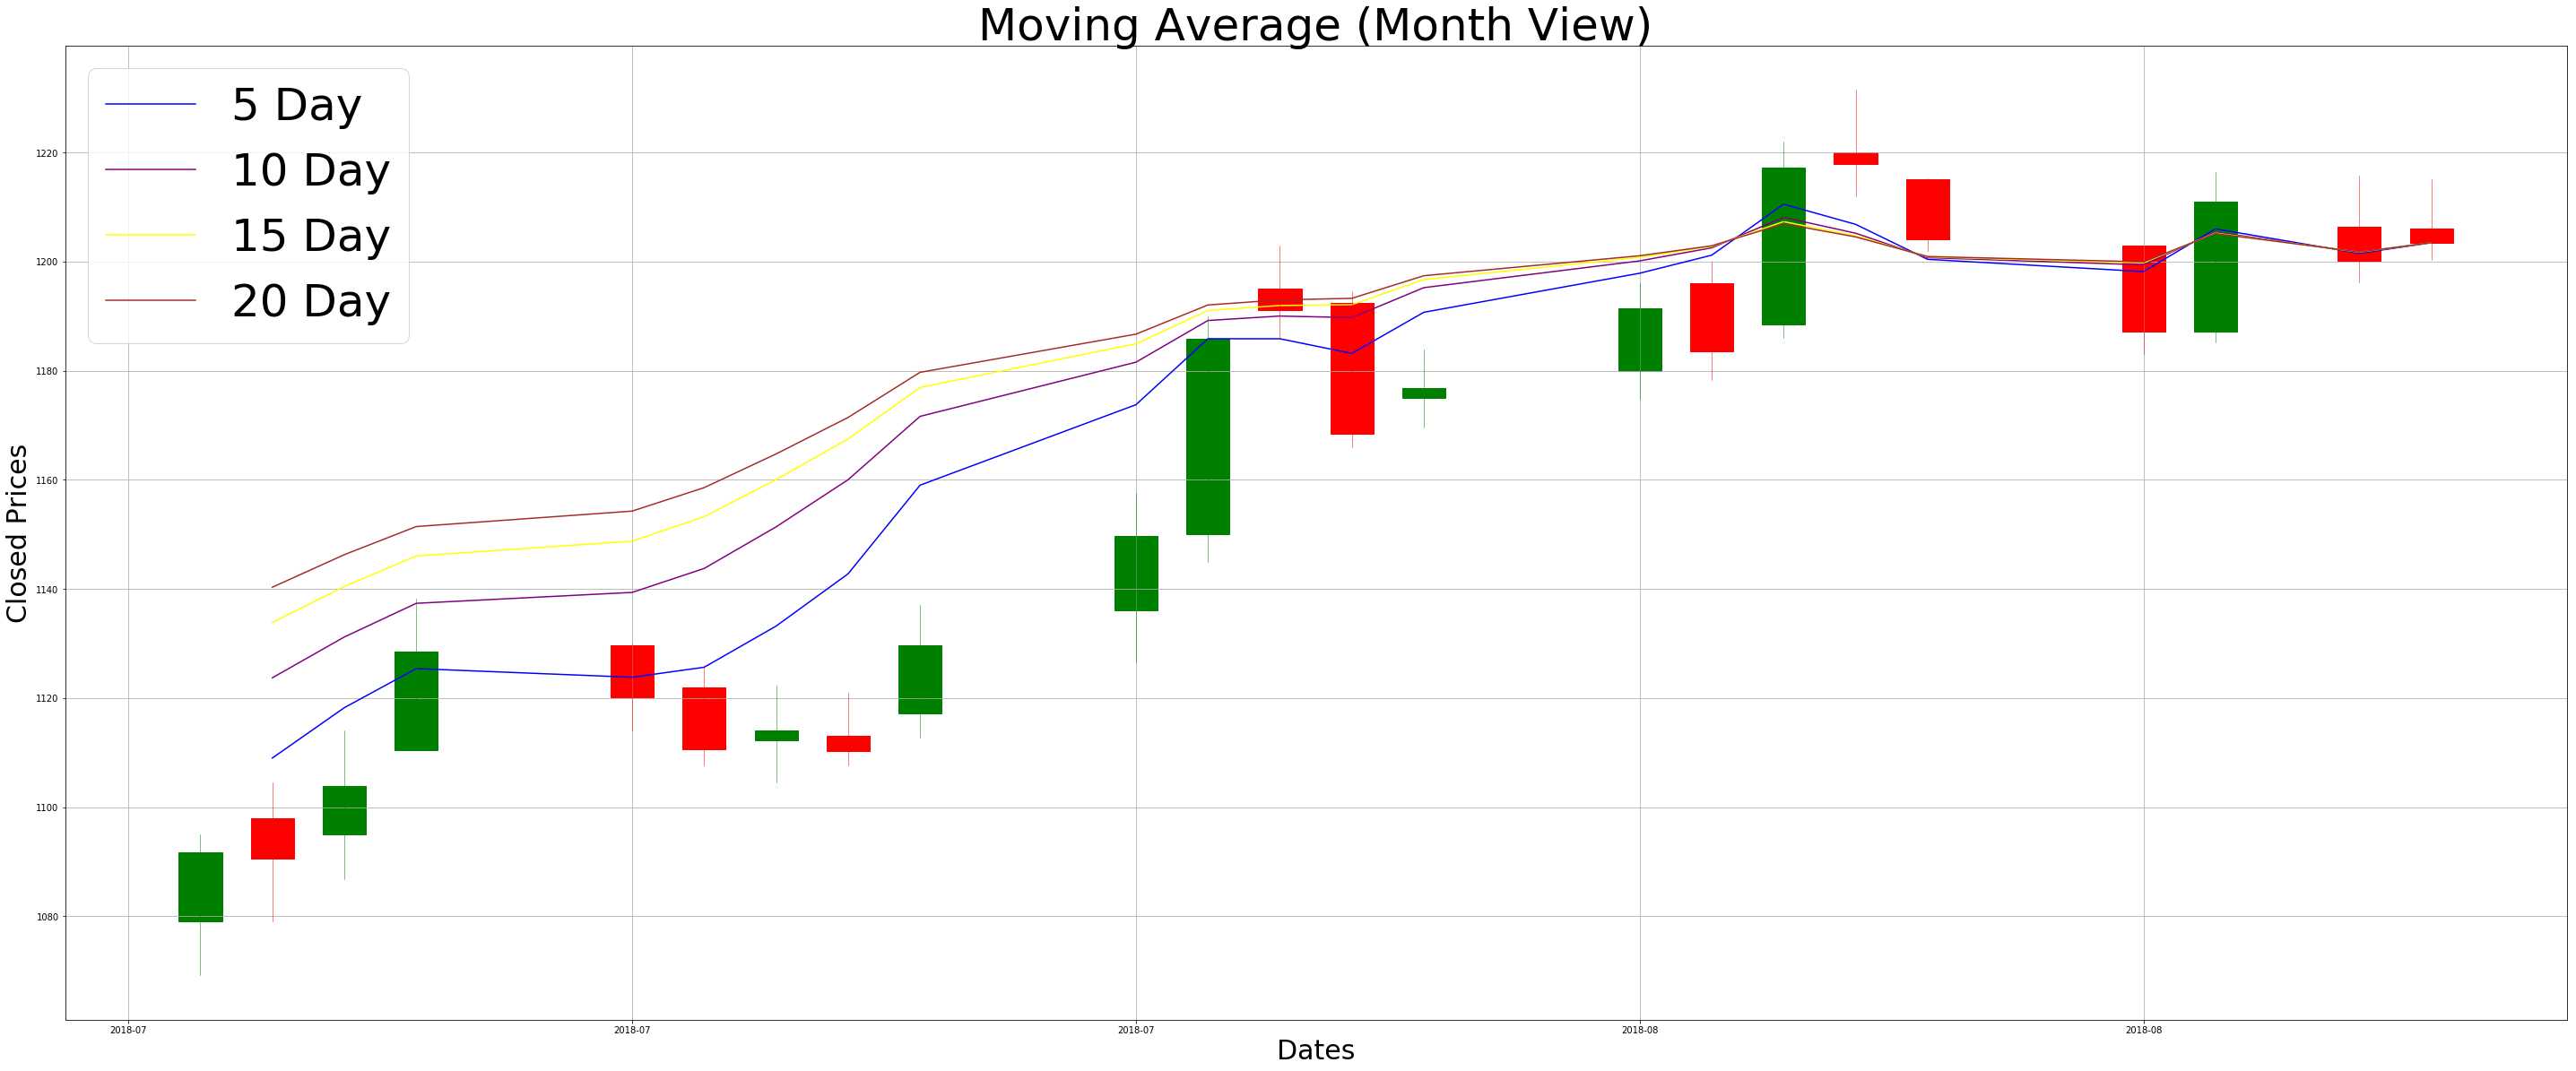

In [13]:
fig, ax = pt.subplots(figsize = (50,20))
REL_df['ema5'] = REL_df['Close'].ewm(span=5, adjust=True).mean()
REL_df['ema10'] = REL_df['Close'].ewm(span=10, adjust=True).mean()
REL_df['ema15'] = REL_df['Close'].ewm(span=15, adjust=True).mean()
REL_df['ema20'] = REL_df['Close'].ewm(span=20, adjust=True).mean()

REL_df = REL_df[REL_df.index > start]

# plot the moving average lines
ax.plot(REL_df.index, REL_df['ema5'], color = 'blue', label = '5 Day')
ax.plot(REL_df.index, REL_df['ema10'], color = 'purple', label = '10 Day')
ax.plot(REL_df.index, REL_df['ema15'], color = 'yellow', label = '15 Day')
ax.plot(REL_df.index, REL_df['ema20'], color = 'brown', label = '20 Day')

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('Dates',size=30, fontsize=30)
ax.set_ylabel('Closed Prices', size=30)
ax.set_title('Moving Average (Month View)', size=50)

# other parameters
ax.grid(True)
ax.legend()
pt.legend(prop={'size':50})

pt.show()

# Daily Return Analysis

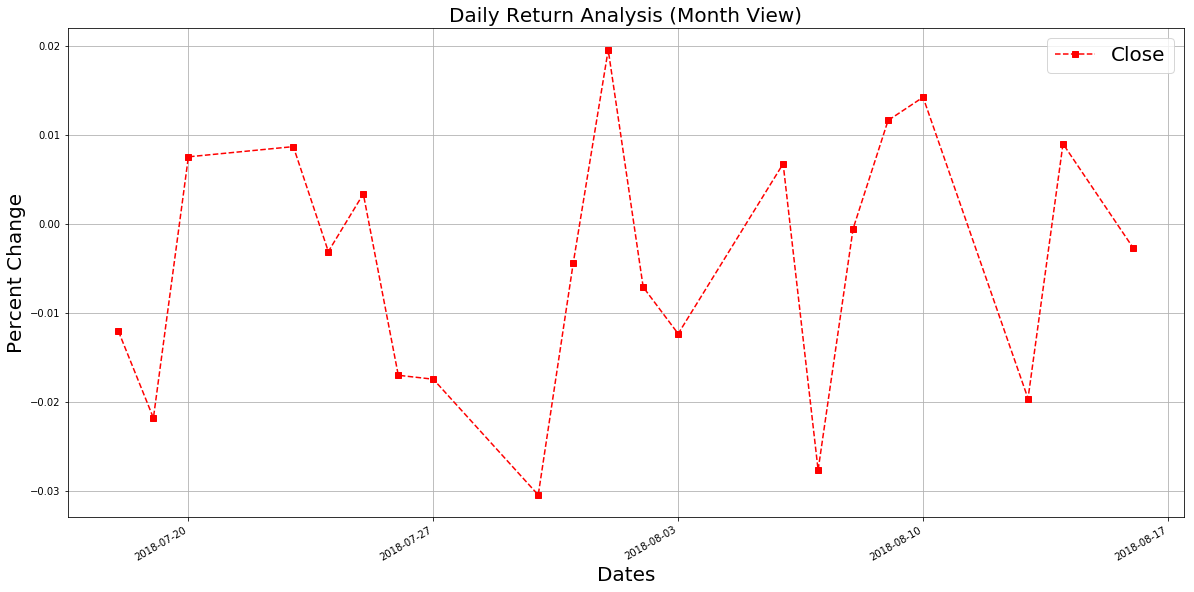

In [14]:
fig, cx = pt.subplots(figsize = (20,10))
(REL_df['Close'].pct_change()).plot( legend=True, linestyle='--', marker='s', color="red")
cx.set_xlabel('Dates',size=30, fontsize=20)
cx.set_ylabel('Percent Change', size=20)
cx.set_title('Daily Return Analysis (Month View)', size=20)

# other parameters
cx.grid(True)
cx.legend()
pt.legend(prop={'size':20})